<a href="https://colab.research.google.com/github/AkulaAnshul/AIML/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=db4f11ece3e0a75c04be4d6b98255fe0177551a43c0ea076548110cbe5211723
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [6]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
topic3 = 'Machine'
topic4 = "ArtificialIntelligence"

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
eng3 = wikipedia.page(topic3).content
eng4 = wikipedia.page(topic4).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content
fr3 = wikipedia.page(topic3).content

wikipedia.set_lang('hi')

h1 = wikipedia.page(topic1).content
h2 = wikipedia.page(topic2).content
h3 = wikipedia.page(topic3).content

This is what the text looks like:

In [8]:
eng4

'Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs.\nSome high-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); interacting via human speech (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT, and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into general applications, often without being called AI because once something becomes useful enoug

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [9]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [10]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
eng3 = cleanup(eng3)
eng4 = cleanup(eng4)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)
fr3 = cleanup(fr3)
h1 = cleanup(h1)
h2 = cleanup(h2)
h3 = cleanup(h3)

In [11]:
print(eng1)
print(eng2)
print(eng3)
print(eng4)
print(fr1)
print(fr2)
print(fr3)
print(h1)
print(h2)
print(h3)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliv

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [12]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

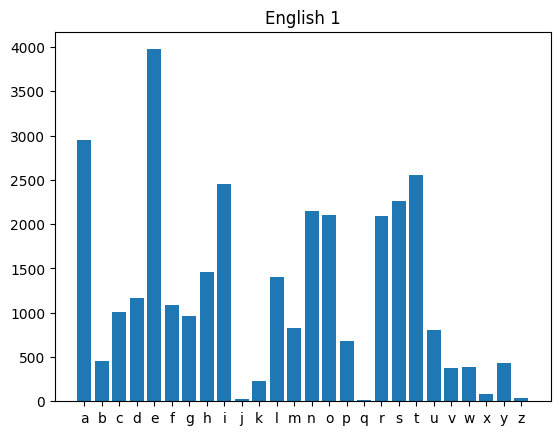

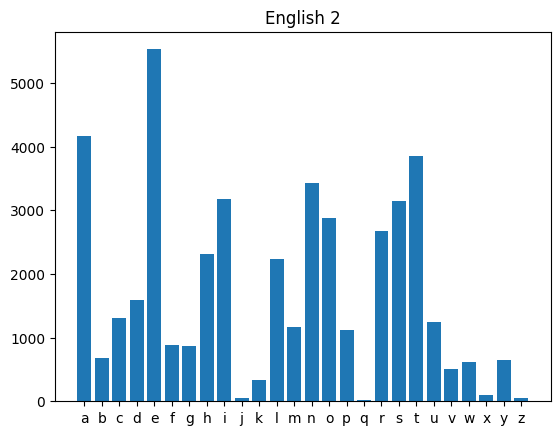

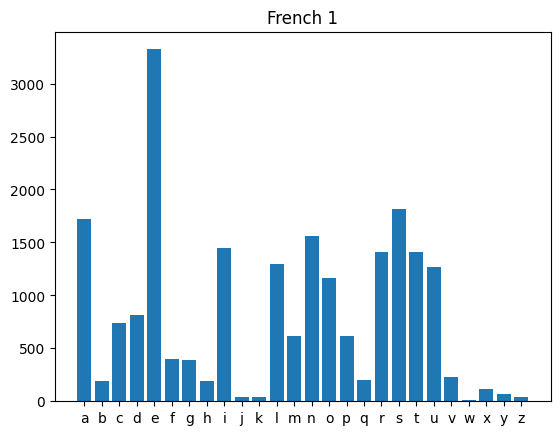

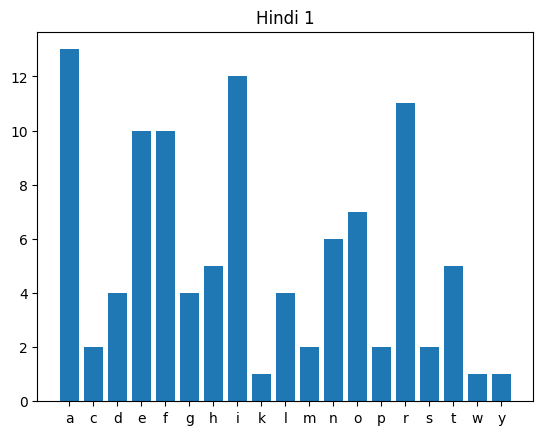

In [14]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()
unigram_h1 = Counter(ngrams(h1,1))
plothistogram(unigram_h1)
plt.title('Hindi 1')
plt.show()

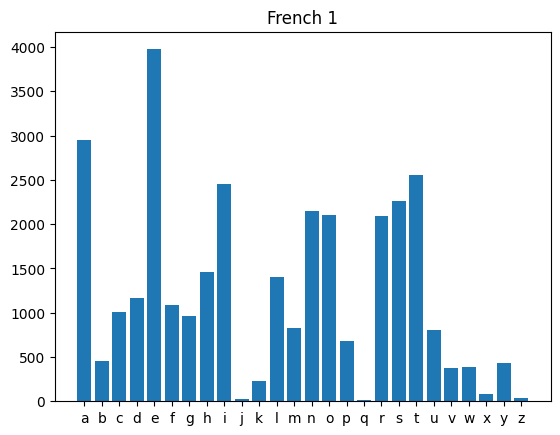

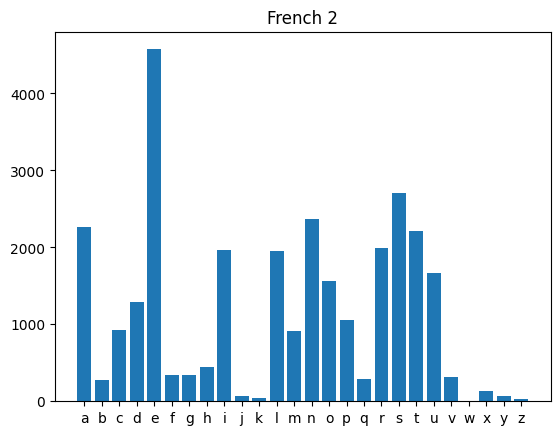

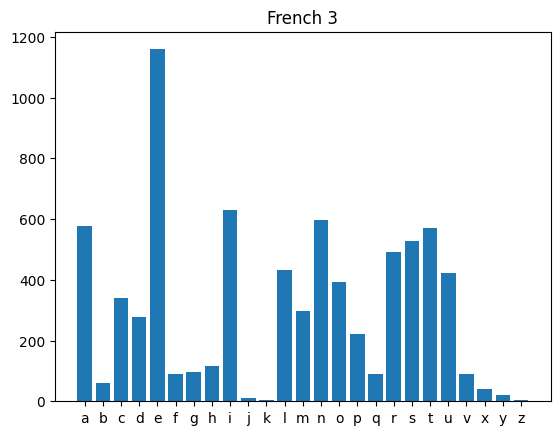

In [16]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()
unigram_fr3 = Counter(ngrams(fr3,1))
plothistogram(unigram_fr3)
plt.title('French 3')
plt.show()

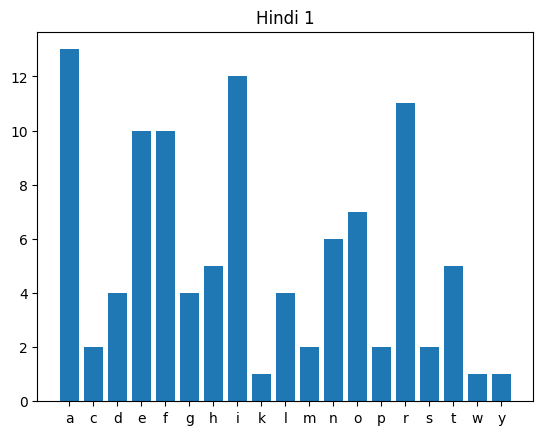

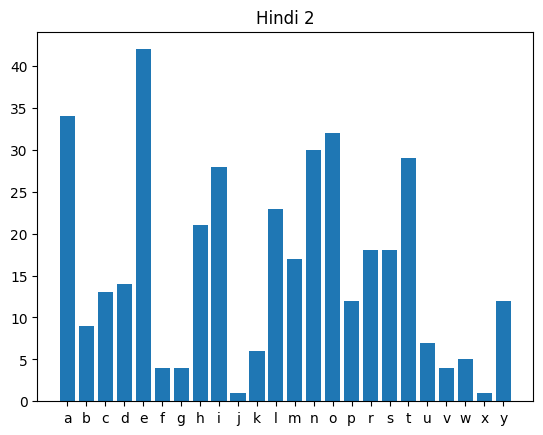

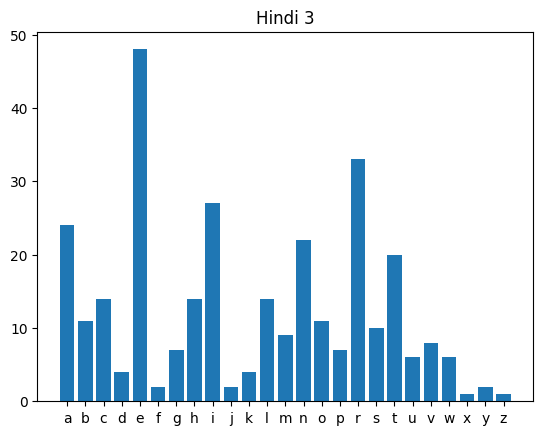

In [17]:
unigram_h1 = Counter(ngrams(h1,1))
plothistogram(unigram_h1)
plt.title('Hindi 1')
plt.show()
unigram_h2 = Counter(ngrams(h2,1))
plothistogram(unigram_h2)
plt.title('Hindi 2')
plt.show()
unigram_h3 = Counter(ngrams(h3,1))
plothistogram(unigram_h3)
plt.title('Hindi 3')
plt.show()#no z in hindi?

The unigrams for Hindi are varying as we can see the unigram for  hr1 has very high number of a's but for the unigram of hr3 doesnt have the high proportions of the letter a. Not sure whether this due to the bad conversion of hindi text to english alphabets

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

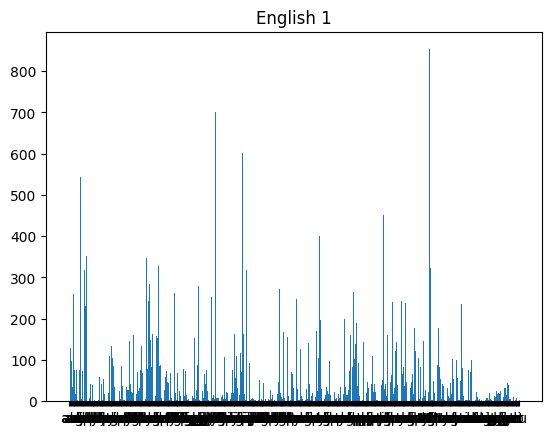

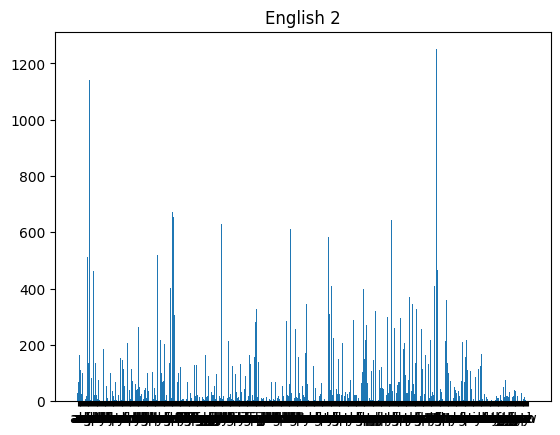

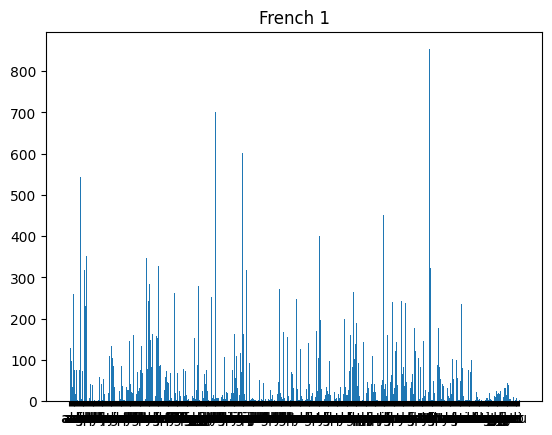

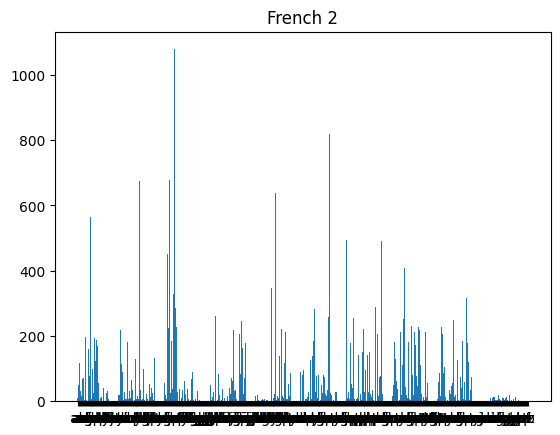

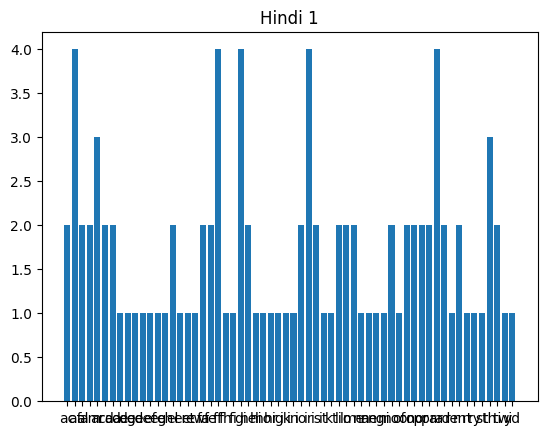

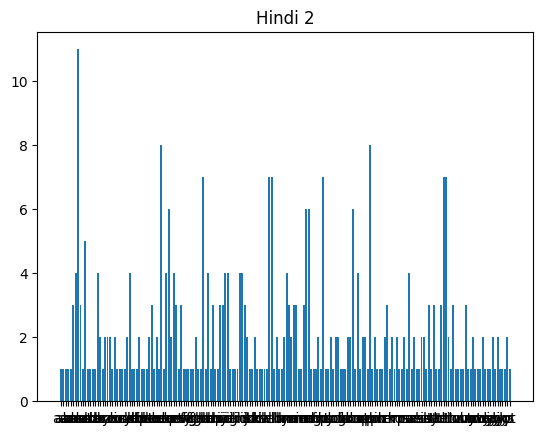

In [18]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()
bigram_h1 = Counter(ngrams(h1,2))
plothistogram(bigram_h1)
plt.title('Hindi 1')
plt.show()
bigram_h2 = Counter(ngrams(h2,2))
plothistogram(bigram_h2)
plt.title('Hindi 2')
plt.show()

Maybe hindi was not a good choice should've gone with spanish or dutch or greek

Another way to visualize bigrams is to use a 2-dimensional graph.

In [19]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

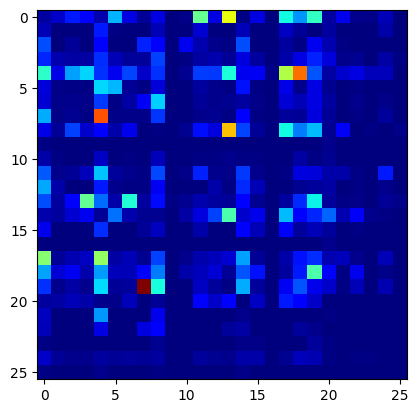

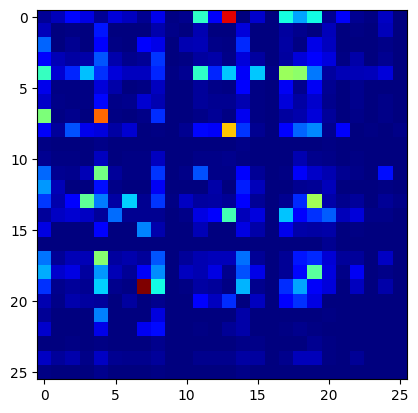

In [20]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

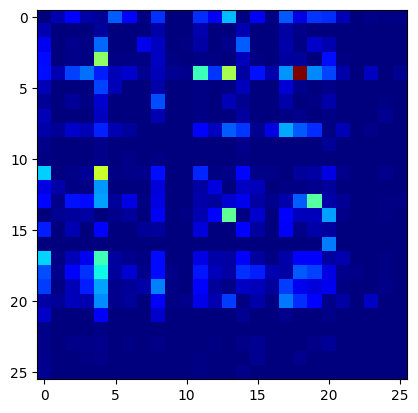

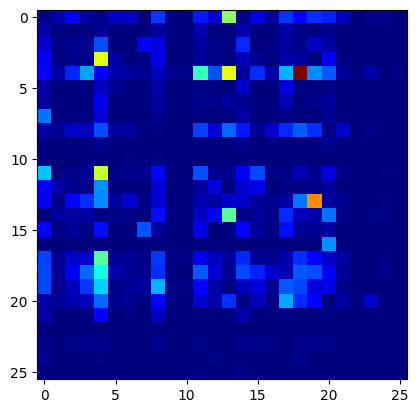

In [21]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

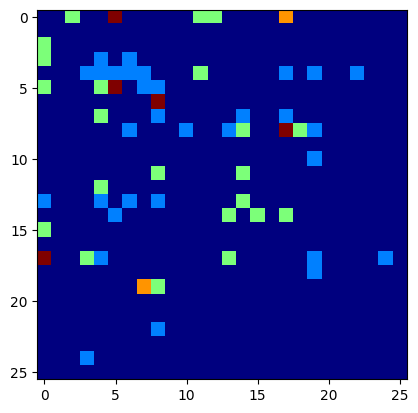

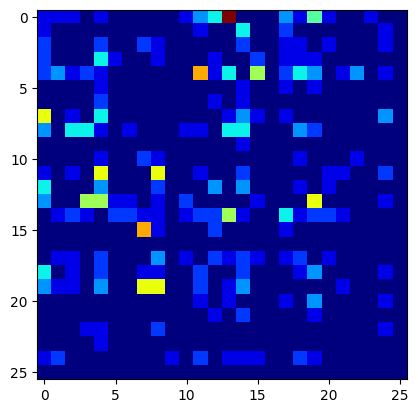

In [22]:
bih1 = plotbihistogram(bigram_h1)
plt.show()
bih2 = plotbihistogram(bigram_h2)

Let us look at the top 10 ngrams for each text.

In [23]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [24]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)
print('\nHindi 1:')
ShowTopN(bih1)
print('\nHindi 2:')
ShowTopN(bih2)
#Yeah looks like hindi converted into english alphabets is not a good representation


English 1:
('t', 'h') : 853.0
('h', 'e') : 700.0
('e', 's') : 674.0
('i', 'n') : 601.0
('a', 'n') : 543.0
('e', 'r') : 483.0
('r', 'e') : 452.0
('r', 'a') : 439.0
('a', 'l') : 406.0
('n', 'd') : 401.0

English 2:
('t', 'h') : 1250.0
('a', 'n') : 1140.0
('h', 'e') : 1000.0
('i', 'n') : 878.0
('n', 't') : 679.0
('e', 'r') : 673.0
('e', 's') : 653.0
('r', 'e') : 644.0
('h', 'a') : 628.0
('l', 'e') : 613.0

French 1:
('e', 's') : 791.0
('l', 'e') : 472.0
('e', 'n') : 438.0
('d', 'e') : 416.0
('o', 'n') : 370.0
('n', 't') : 359.0
('r', 'e') : 337.0
('e', 'l') : 335.0
('s', 'e') : 291.0
('r', 'a') : 265.0

French 2:
('e', 's') : 1078.0
('n', 't') : 819.0
('e', 'n') : 679.0
('d', 'e') : 675.0
('l', 'e') : 638.0
('a', 'n') : 564.0
('o', 'n') : 494.0
('r', 'e') : 490.0
('e', 'l') : 452.0
('s', 'e') : 408.0

Hindi 1:
('g', 'i') : 4.0
('r', 'a') : 4.0
('f', 'f') : 4.0
('a', 'f') : 4.0
('i', 'r') : 4.0
('a', 'r') : 3.0
('t', 'h') : 3.0
('o', 'p') : 2.0
('e', 'l') : 2.0
('o', 'n') : 2.0

Hindi 2:


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [25]:
# Function to plot heatmap for bigrams and trigrams
def plot_heatmap(ngram, title):
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    df = pd.DataFrame({
        'Ngram': keys,
        'Frequency': values
    })

    # Convert to pivot table for heatmap (split bigram into two parts)
    df['First'] = df['Ngram'].apply(lambda x: x[0])
    df['Second'] = df['Ngram'].apply(lambda x: x[1] if len(x) > 1 else x)

    # Create heatmap from bigrams
    heatmap_data = df.pivot("First", "Second", "Frequency").fillna(0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="YlGnBu")
    plt.title(title)
    plt.show()

# Function to plot bar chart for ngrams
def plot_bar_chart(ngram, title):
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[1], reverse=True)  # Sort by frequency
    keys, values = map(list, zip(*zipped_sorted))

    plt.figure(figsize=(10, 6))
    plt.bar(keys[:10], values[:10])  # Plot top 10 n-grams
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


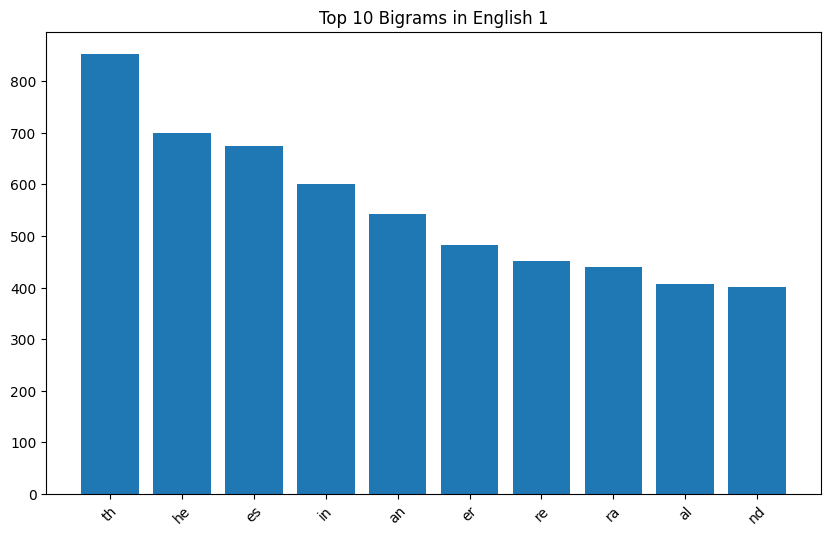

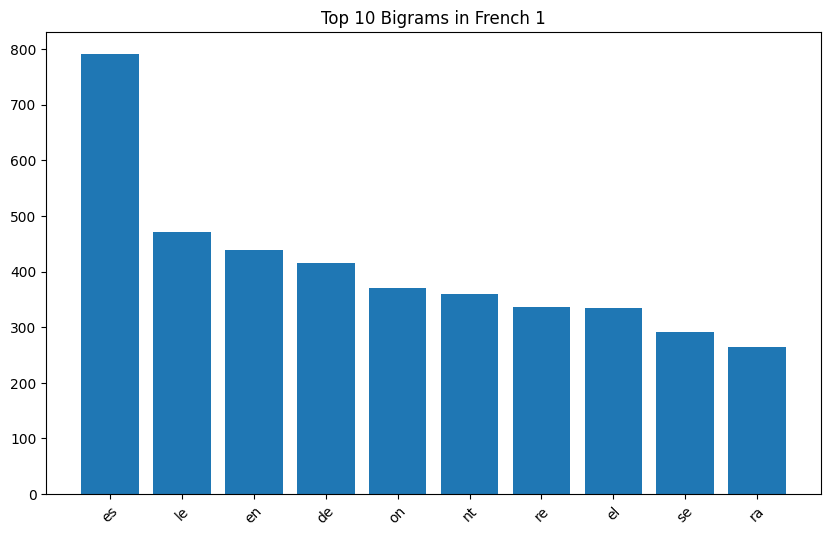

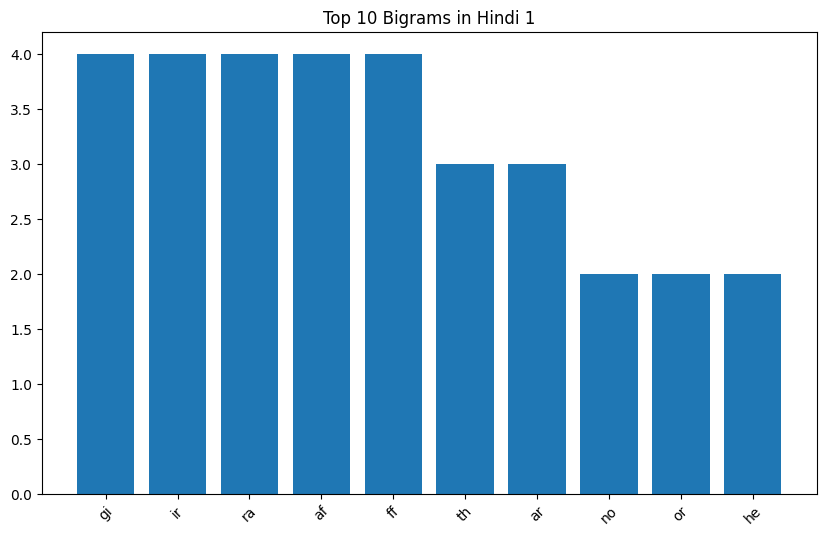

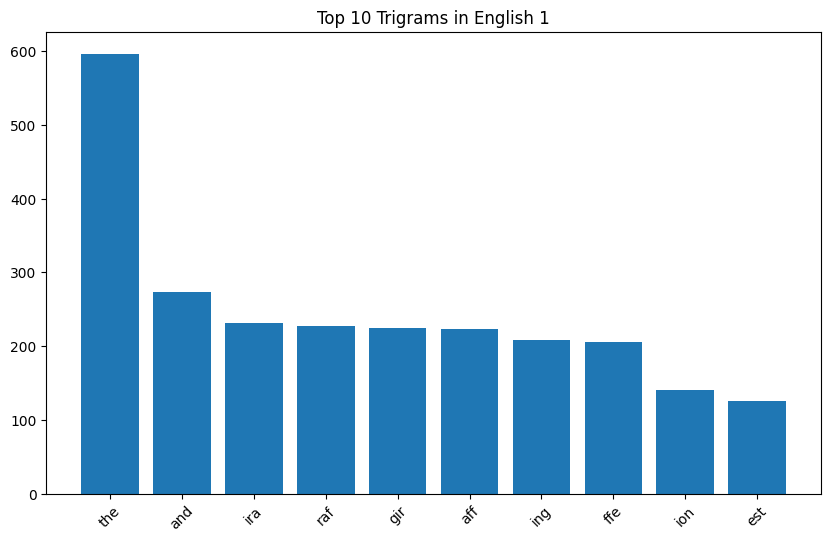

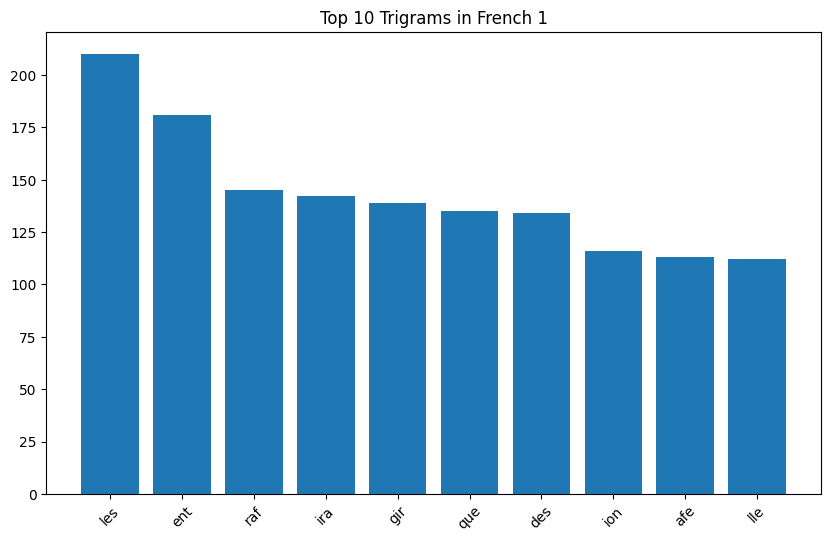

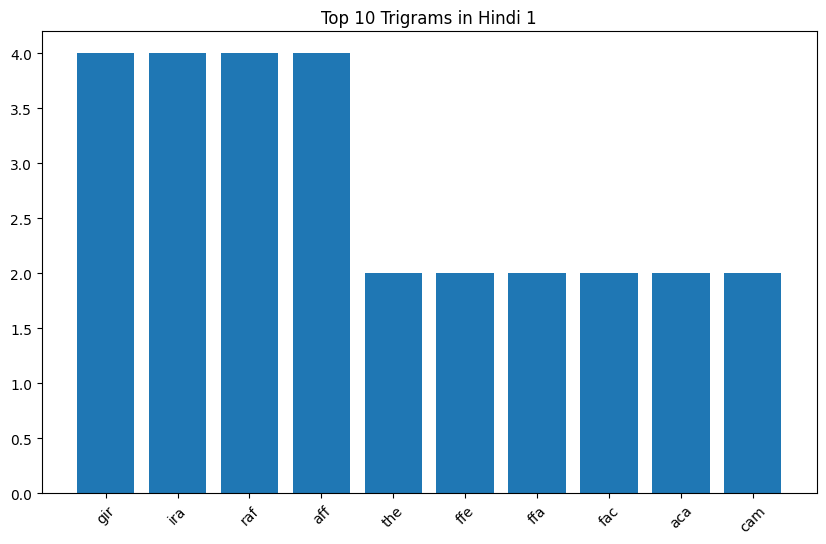

In [29]:
# Generate bigrams and trigrams for the cleaned texts
bigram_eng1 = Counter(ngrams(eng1, 2))
trigram_eng1 = Counter(ngrams(eng1, 3))

bigram_fr1 = Counter(ngrams(fr1, 2))
trigram_fr1 = Counter(ngrams(fr1, 3))

bigram_h1 = Counter(ngrams(h1, 2))
trigram_h1 = Counter(ngrams(h1, 3))

# Plot bar charts for bigrams
plot_bar_chart(bigram_eng1, "Top 10 Bigrams in English 1")
plot_bar_chart(bigram_fr1, "Top 10 Bigrams in French 1")
plot_bar_chart(bigram_h1, "Top 10 Bigrams in Hindi 1")

# Plot heatmaps for bigrams
#plot_heatmap(bigram_eng1, "Bigram Heatmap for English 1")
#plot_heatmap(bigram_fr1, "Bigram Heatmap for French 1")
#plot_heatmap(bigram_h1, "Bigram Heatmap for Hindi 1")

# Plot bar charts for trigrams
plot_bar_chart(trigram_eng1, "Top 10 Trigrams in English 1")
plot_bar_chart(trigram_fr1, "Top 10 Trigrams in French 1")
plot_bar_chart(trigram_h1, "Top 10 Trigrams in Hindi 1")

# You can add heatmap for trigrams similarly (with adjustments for 3-gram format)


# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [30]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [31]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

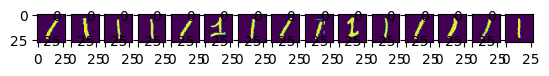

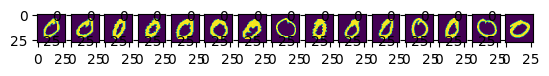

In [37]:
for ii in range(15):
  plt.subplot(1, 15, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(15):
  plt.subplot(1, 15, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

**So** Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [38]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

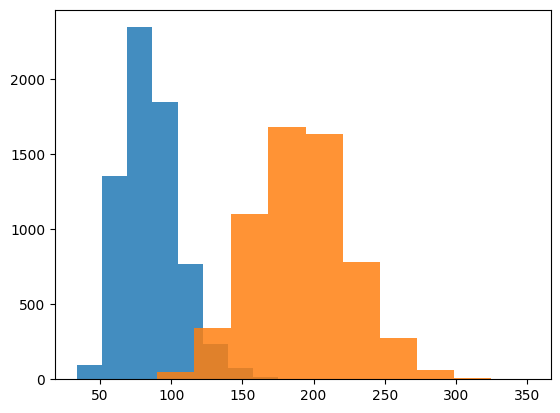

In [49]:
plt.hist(sum1, alpha=0.84);
plt.hist(sum0, alpha=0.84);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [40]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

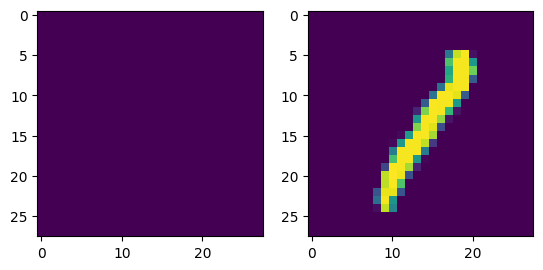

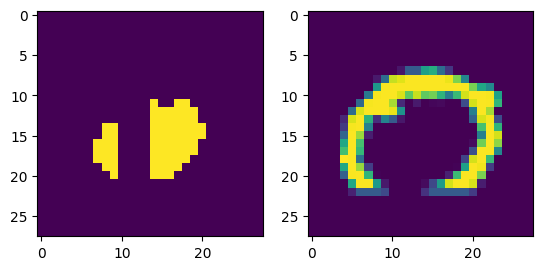

In [51]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

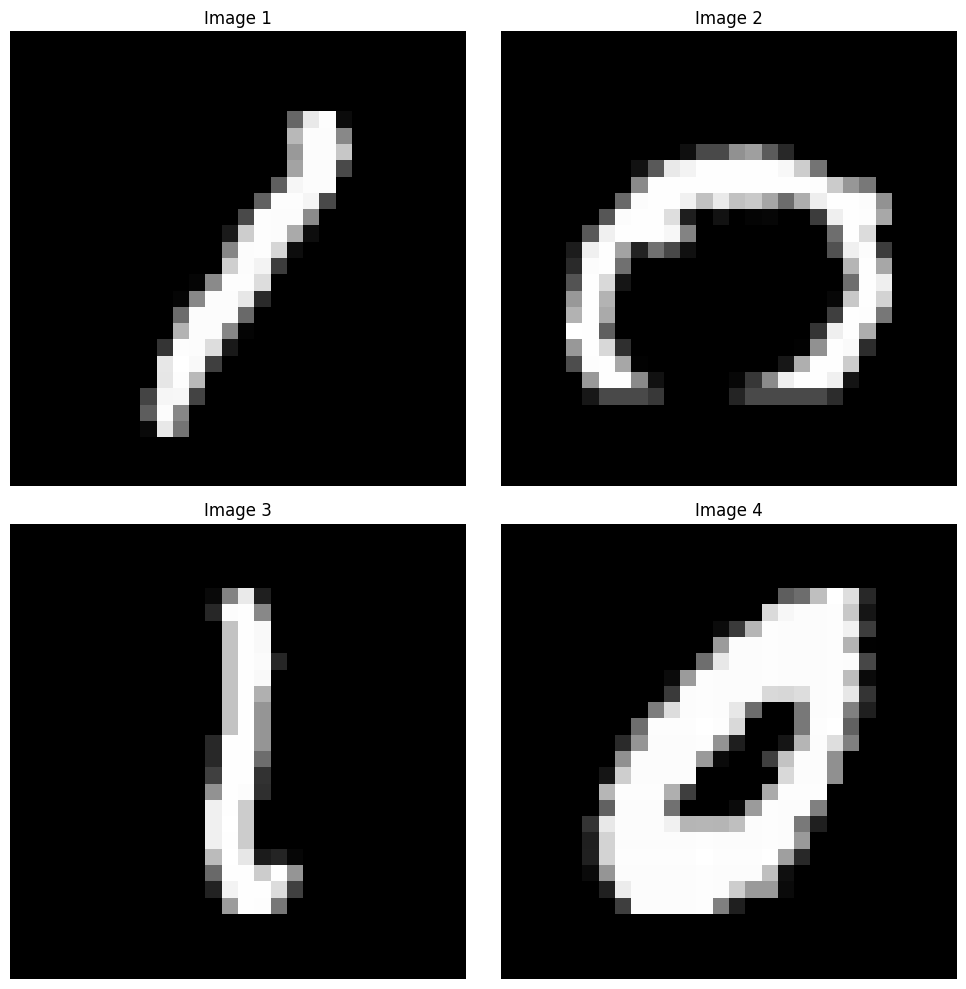

In [54]:
import matplotlib.pyplot as plt

# Example list of images (for illustration purposes)
imgs = [no1[456,:,:], no0[456,:,:], no1[123,:,:], no0[123,:,:]]

# Create subplots (2 images per row)
num_images = len(imgs)
cols = 2  # Images per row
rows = (num_images + cols - 1) // cols  # Dynamically calculate rows

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

# Flatten axes if multiple rows
axes = axes.flatten() if rows > 1 else [axes]

# Loop over images and display them
for i, img in enumerate(imgs):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

    # Set the background color to blue
    axes[i].set_facecolor('blue')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


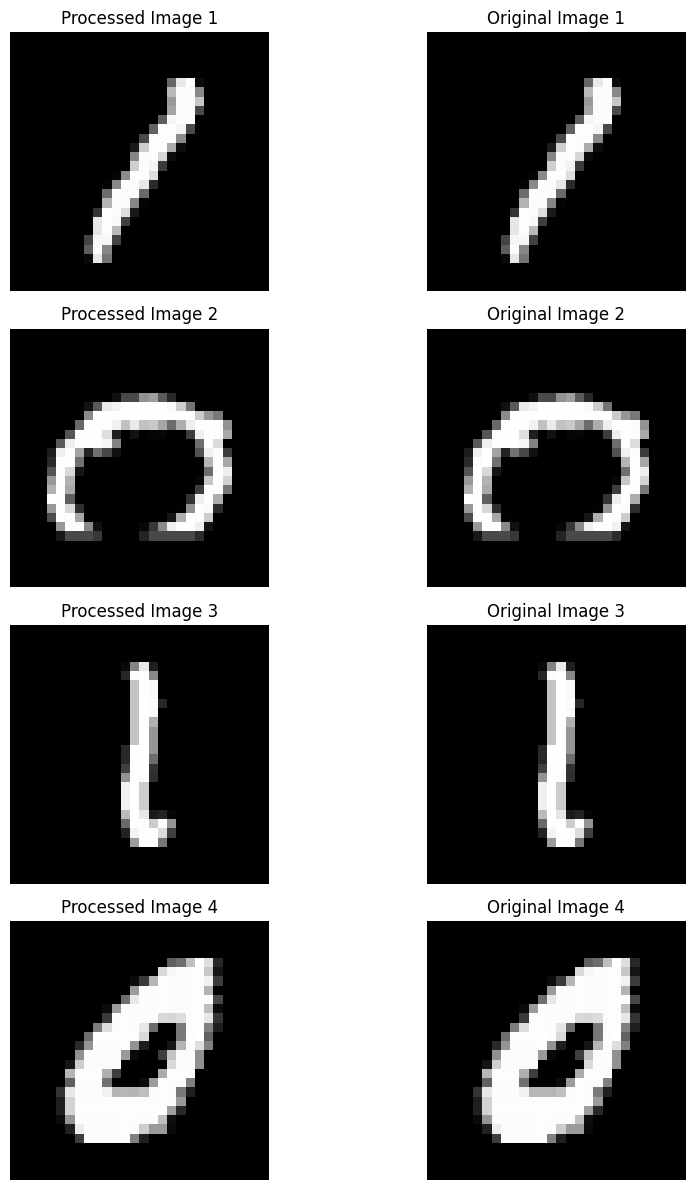

In [55]:
def getHolePixels(img):
    # Example function that processes the image
    return img * 0.5  # Modify as per actual implementation

# List of images
imgs = [no1[456,:,:], no0[456,:,:], no1[123,:,:], no0[123,:,:]]

# Create subplots (2 images per row: one for original and one for processed image)
num_images = len(imgs)
cols = 2  # Show pairs of original and processed images side by side
rows = num_images  # One row per image pair

fig, axes = plt.subplots(rows, cols, figsize=(10, rows*3))

# Loop through images and plot both original and processed versions
for i, img in enumerate(imgs):
    # Left column: processed image (e.g., from getHolePixels)
    axes[i, 0].imshow(getHolePixels(img), cmap='gray')
    axes[i, 0].set_title(f"Processed Image {i+1}")
    axes[i, 0].axis('off')

    # Right column: original image
    axes[i, 1].imshow(img, cmap='gray')
    axes[i, 1].set_title(f"Original Image {i+1}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


Now let us plot the number of hole pixels and see how this feature behaves

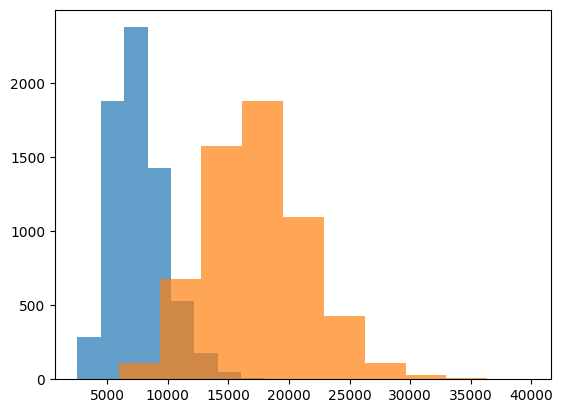

In [56]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [57]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

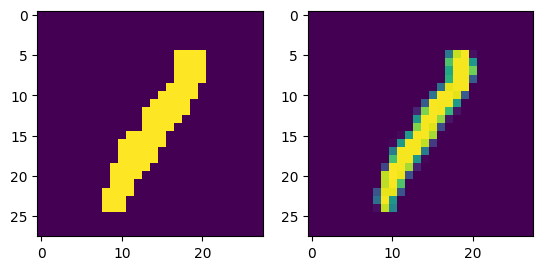

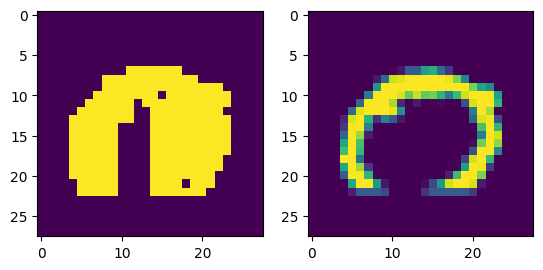

In [58]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

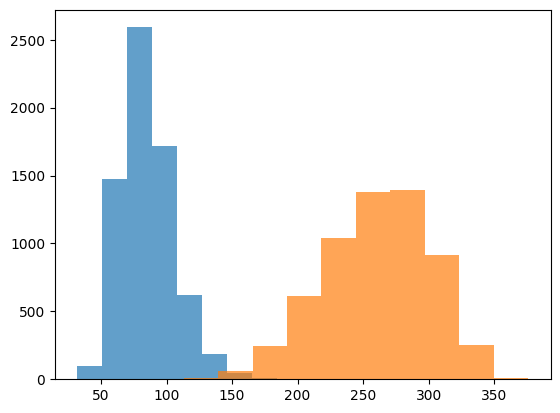

In [59]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [60]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

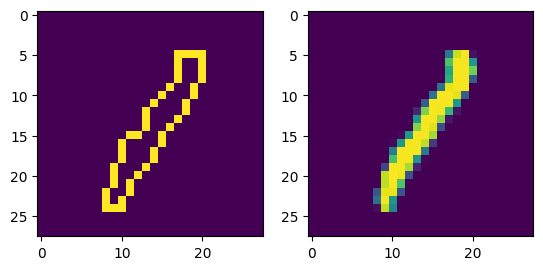

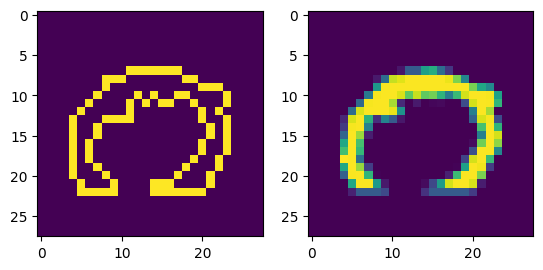

In [61]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

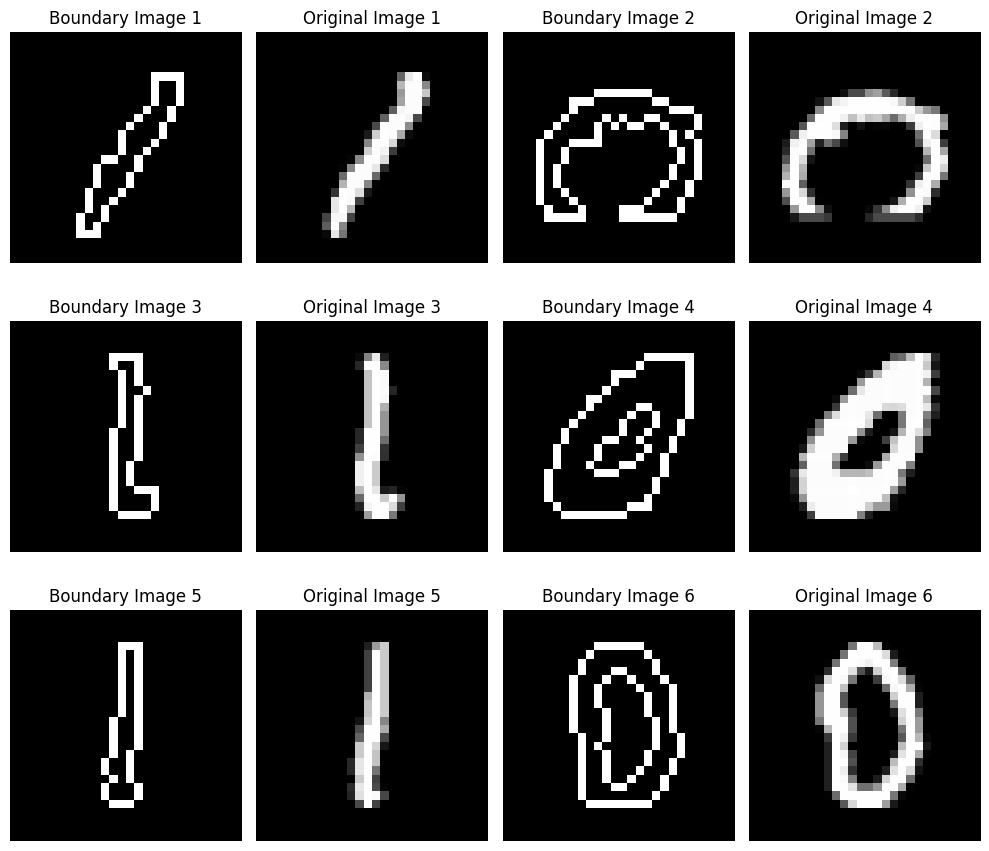

In [64]:
import matplotlib.pyplot as plt
imgs = [no1[456,:,:], no0[456,:,:], no1[123,:,:], no0[123,:,:], no1[789,:,:], no0[789,:,:]]
num_images = len(imgs)
cols = 2
rows = (num_images + cols - 1) // cols
fig, axes = plt.subplots(rows, cols*2, figsize=(10, rows * 3))
axes = axes.flatten() if rows > 1 else [axes]
for i, img in enumerate(imgs):
    axes[i*2].imshow(getBoundaryPixels(img), cmap='gray')
    axes[i*2].set_title(f"Boundary Image {i+1}")
    axes[i*2].axis('off')
    axes[i*2 + 1].imshow(img, cmap='gray')
    axes[i*2 + 1].set_title(f"Original Image {i+1}")
    axes[i*2 + 1].axis('off')

plt.tight_layout()
plt.show()


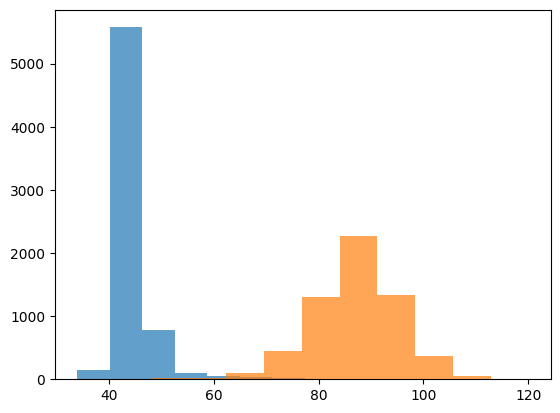

In [67]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])
#bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
#plt.hist(bound2, alpha=0.7);

What will happen if we plot two features together?

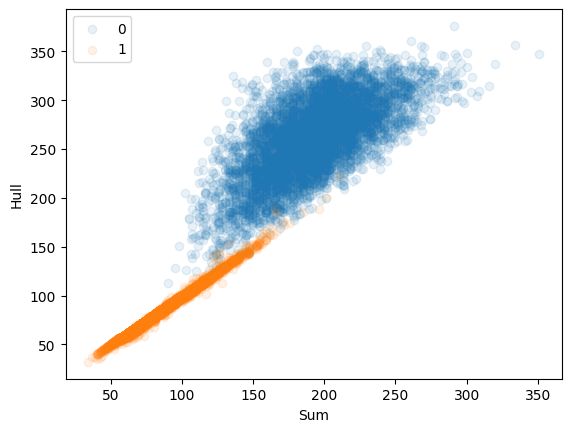

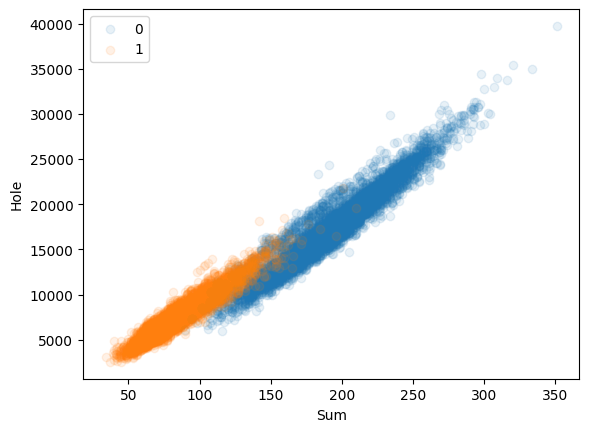

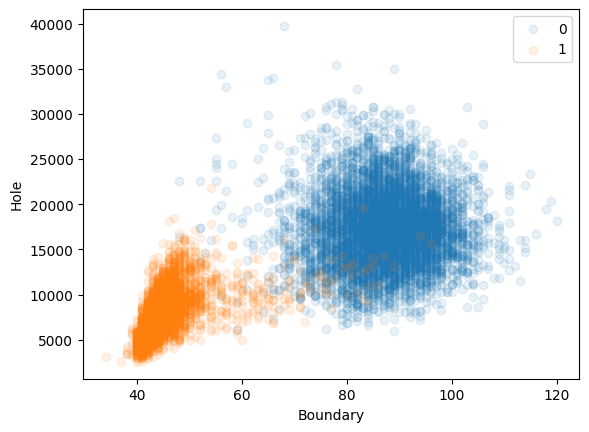

In [68]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [69]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1. From what i've learned and observed so far(in my opnion) the no. of pixels in the boundary and no. of holes is the easiest and the most intresting way of finding out what number is being displayed.But this combination might not work for all the various numbers out there with various hanwritten versions of them .
2. From what i've read online we can use the follwing to visualize the following to visualize more than 2 features simultaneously.They are
Pairwise scatter plots,Parallel coordinates,PCA,t-SNE or UMAP.I am not familiar with them so far so I cannot confirm them to be reailable in visualizing four or more features
3. Some of the features that come to mind are presence of axis of symmetry, we can check whether the given number is symmetric or not for example 8 has a axis of symmetry and 3 also has a axis of symmetry but 9 doesnt have a axis of symmetry.We can also use curvature of the digit like 6,3 have curved edges but 1,4,7 do not have a curved edge.
4. Yes , I think the features mentioned in the lab might work with other classes other than 0 and 1 as many of the other classes also, as the other classes are also pretty similar to 0 and 1 whehther it be the no. of pixels covered by them or the no. of holes(this one may not always work as 0,6,9 all have a single hole so it may not be possilbe for all the classes).
5.Adding more classes will increase the complexity of the classification and various different features will be neaded to clssify the various classes accurately